<b><font size="5">PDS Group Project - Where Should I Live? </font></b>

<font size="5">Group 10: </font>
 - Lucas Casimiro (20241796)
 - Lucas Christol (20241827)
 - Miguel Gomes (20241793)
 - Pedro Ferreira (20241735)

Public GitHub repository:
https://github.com/lucasvcasimiro-byte/Group10_PDS_Project_2526


### <font color='#BFD72F'>Table of Contents </font> <a class="anchor" id='toc'></a> 

- [1. Data Wrangling and Analysis](#P1) 
    - [Importation](#P1.1)
    - [Data Cleaning](#P1.2)
    - [Answers to assigned questions](#P1.3)

- [2. Advanced Topic - Building an Interactive Map](#P2) 
    - [Web Scraping](#P2.1)
    - [Interactive Map](#P2.2)

- [3. Data Science In Action](#P3)
    - [Adding extra data](#P3.1)
    - [Recommendation System](#P3.2)

<hr style = "border: 3px solid' #BFD72F';">

# <font color='#BFD72F'>1. Data Wrangling and Analysis</font> <a class="anchor" id="P1"></a>

## <font color='#BFD72F'>1.1 Importation <a class="anchor" id="P1.1"></a>

We start by importing all necessary libraries:

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import requests
from bs4 import BeautifulSoup
import time
import plotly.express as px
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from IPython.display import display, Markdown

import warnings
warnings.filterwarnings('ignore')

print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("seaborn:", sns.__version__)
print("requests:", requests.__version__)

pandas: 2.3.2
numpy: 2.2.6
seaborn: 0.13.2
requests: 2.32.5


Next, importing the dataset and fixing easily solvable small issues for better reading.

In [237]:
city_data = pd.read_csv('city_data.csv',sep='|',header=1)
city_data.index=city_data.index + 1
city_data.rename(columns={'Avgerage Rent Price': 'Average Rent Price'}, inplace=True)
city_data.head()

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
1,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,340.0,2024-06-15 00:00:00
2,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,NaN,2023-11-03 00:00:00
3,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,NaN,2023-04-22 00:00:00
4,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,NaN,2024-08-09 00:00:00
5,"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,120.0,2023-07-17 00:00:00


## <font color='#BFD72F'>1.2 Data Cleaning <a class="anchor" id="P1.1"></a>

Collecting the initial information so we know the basic issues:

In [238]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 1 to 86
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   City                             86 non-null     object 
 1   Population Density               85 non-null     float64
 2   Population                       86 non-null     int64  
 3   Working Age Population           85 non-null     float64
 4   Youth Dependency Ratio           86 non-null     float64
 5   Unemployment Rate                85 non-null     float64
 6   GDP per Capita                   85 non-null     float64
 7   Days of very strong heat stress  86 non-null     int64  
 8   Main Spoken Languages            85 non-null     object 
 9   Average Monthly Salary           86 non-null     int64  
 10  Average Rent Price               86 non-null     int64  
 11  Average Cost of Living           86 non-null     int64  
 12  Average Price Groceries 

In [239]:
city_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Population Density,85.0,1.115141e+03,2.542779e+03,65.00,304.000,548.00,1020.000,20983.0
Population,86.0,1.754370e+06,1.843133e+06,73895.00,528118.500,1178397.00,2315896.000,12396541.0
Working Age Population,85.0,1.158294e+06,1.232534e+06,46359.00,358020.000,733794.00,1534225.000,8274794.0
Youth Dependency Ratio,86.0,2.409686e+01,3.266421e+00,19.30,21.425,23.15,25.925,37.8
Unemployment Rate,85.0,6.667059e+00,4.553632e+00,1.40,3.700,5.30,8.100,23.0
GDP per Capita,85.0,5.175027e+04,2.149562e+04,10089.92,38664.000,49329.00,63083.000,146094.0
Days of very strong heat stress,86.0,4.348837e+00,1.003848e+01,0.00,0.000,1.00,3.000,59.0
Average Monthly Salary,86.0,2.434488e+03,1.188603e+03,750.00,1412.500,2400.00,3200.000,6636.0
Average Rent Price,86.0,1.070105e+03,4.989646e+02,100.00,800.000,1050.00,1250.000,3190.0
Average Cost of Living,86.0,1.808384e+03,7.279997e+02,800.00,1300.000,1665.00,2100.000,4862.0


We then create a column for only the city and one for only the country, for more clarity and easier processes in the rest of the notebook.

In [240]:
# Creating a copy to edit without affecting the original dataset
city_data_copy = city_data.copy()

# Standardizing the separators with Regex to handle incorrect cases (';' or '.' instead of ',')
city_data_copy['City_Fixed'] = city_data_copy['City'].astype(str).apply(lambda x: re.sub(r'\s*[.;]\s*', ', ', x.split('\n')[0]).strip())

# Fixing a specific wrong value
city_data_copy['City_Fixed'] = city_data_copy['City_Fixed'].replace({'Greece, Athens': 'Athens, Greece'})

# Splitting the data into a separate dataset, using comma only to include cases where there is no space between comma and country
split_data = city_data_copy['City_Fixed'].str.split(',', n=1, expand=True)

# Creating the new columns in the original dataset and replacing the 'City' with its fixed version (including the .str.strip() method to clean any hidden spaces left by the split)
city_data['City_Only'] = split_data[0].str.strip()
city_data['Country'] = split_data[1].str.strip()

# Making sure the 'City' column in the original dataset is clean
city_data['City'] = city_data['City_Only'] + ', ' + city_data['Country']

city_data.head()

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update,City_Only,Country
1,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,340.0,2024-06-15 00:00:00,Vienna,Austria
2,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,NaN,2023-11-03 00:00:00,Salzburg,Austria
3,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,NaN,2023-04-22 00:00:00,Brussels,Belgium
4,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,NaN,2024-08-09 00:00:00,Antwerp,Belgium
5,"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,120.0,2023-07-17 00:00:00,Gent,Belgium


We also use the function .strip on the titles for each column, to avoid errors in their future mentions.

In [241]:
city_data.columns = city_data.columns.str.strip()

#### <font color='#BFD72F'>Duplicate entries <a class="anchor" id="P1.1"></a>

We identified how many exact duplicate rows there were, and removed them from the dataset.

In [242]:
# Handling duplicates 
duplicates = city_data.duplicated().sum()
print(f'{duplicates} duplicate rows found')
if duplicates > 0:
    city_data.drop_duplicates(inplace=True)

2 duplicate rows found


In [243]:
#Check if duplicate rows were deleted
duplicates_check = city_data.duplicated().sum()
print(f'{duplicates_check} duplicate rows found')

0 duplicate rows found


#### <font color='#BFD72F'> Outliers <a class="anchor" id="P1.1"></a>

We isolate numerical columns to search for unrealistic or impossible values.

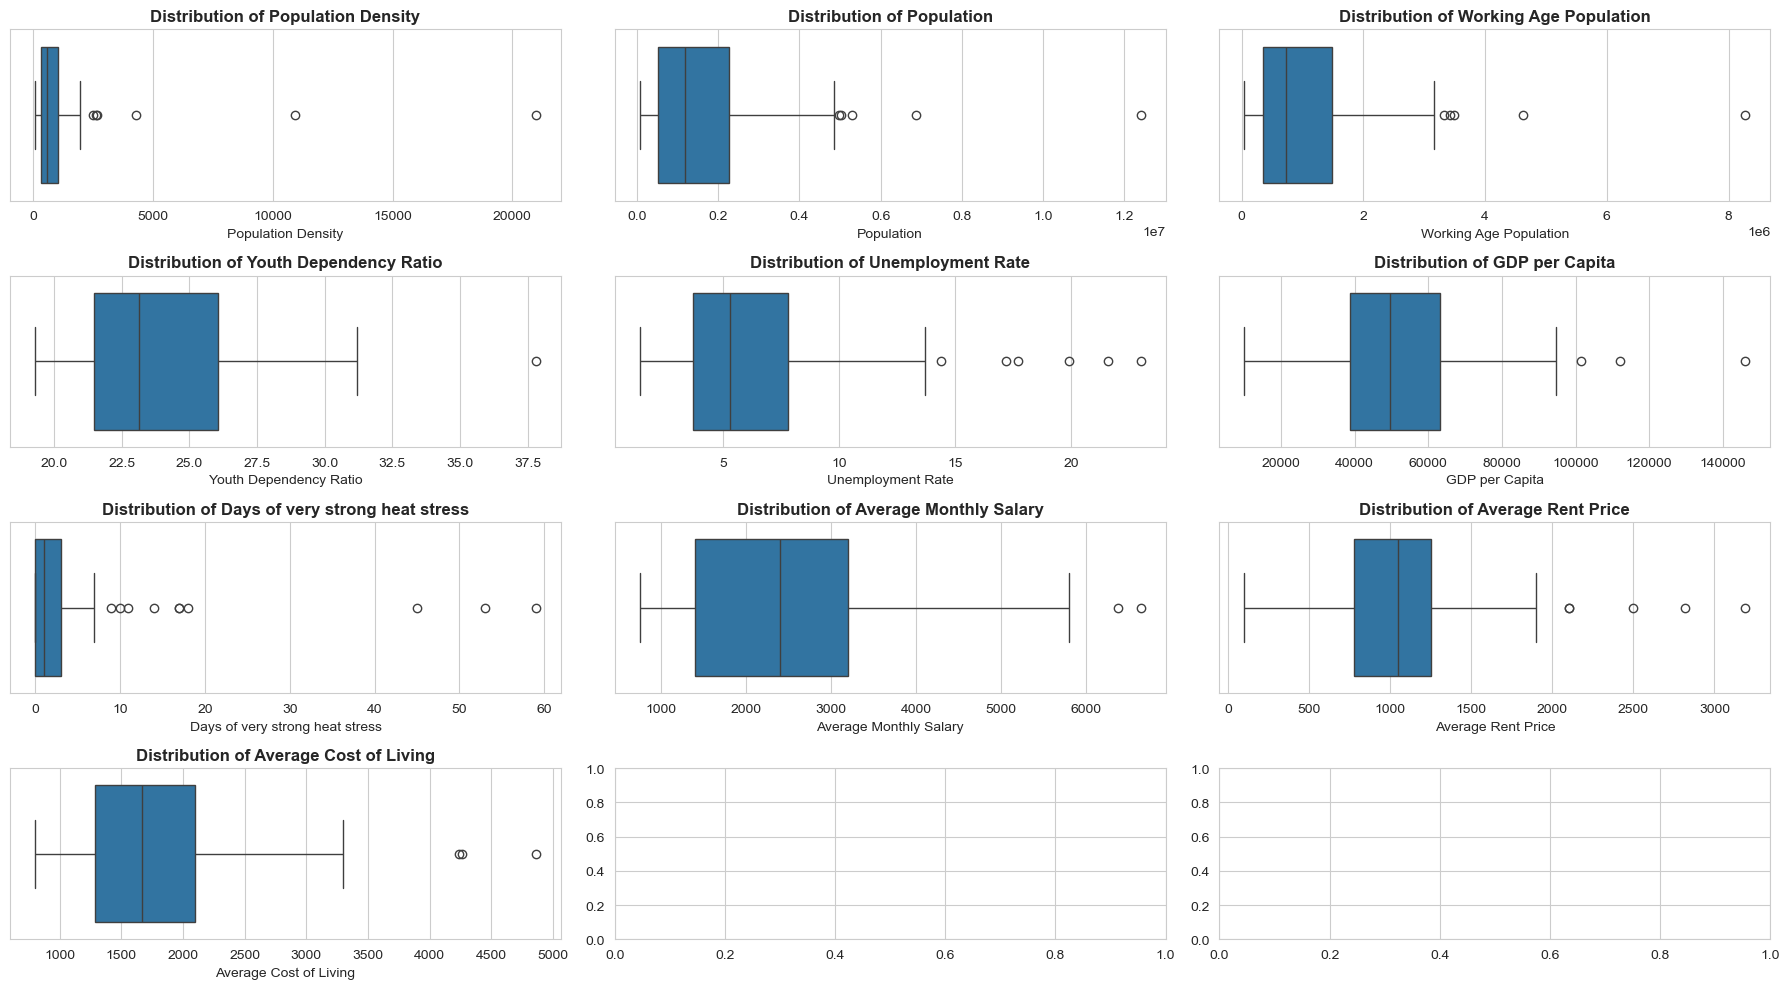

In [244]:
num_cols = ['Population Density', 'Population', 'Working Age Population', 'Youth Dependency Ratio', 'Unemployment Rate',
             'GDP per Capita', 'Days of very strong heat stress', 'Average Monthly Salary', 'Average Rent Price', 'Average Cost of Living']

# Boxplots for numerical columns
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 10))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(x=city_data[col], ax=axes[i])
    
    axes[i].set_title(f'Distribution of {col}', fontweight='bold')

plt.tight_layout()
plt.show()


There are clearly outliers, but most are realistic values for a city. The only feature that seems to have unrealistics values is 'Average Rent Price', which we will evaluate further.

In [245]:
# Getting the 5 cities with the lowest rent prices
lowest_5 = city_data[['City', 'Average Rent Price']].sort_values(by='Average Rent Price', ascending=True).head(5)
lowest_5


,City,Average Rent Price
14,"Prague, Czechia",100
86,"Adana, Turkiye",350
8,"Dobrich, Bulgaria",400
7,"Sofia, Bulgaria",450
79,"Giroc, Romania",450


There is 1 values (Prague) considerably lower than others, so we will set a minimum threshold to the second lowest value, which is already realistic.

In [246]:
# Flooring rent price for Prague to 350 euros
city_data.loc[city_data['Average Rent Price'] < 200, 'Average Rent Price'] = 350


No additional measures will be taken for outliers, because as previously mentioned, higher values are realistic values for the other columns (e.g. Population or Average Cost of Living).

## <font color='#BFD72F'>1.3 Answers to assigned questions <a class="anchor" id="P1.1"></a>

#### <font color='#BFD72F'>Missing Values <a class="anchor" id="P1.1"></a>

In [247]:
# Handling missing values (from .info())
#'Average Price Groceries' has 80 missing values out of 86, so it won't be useful
city_data.drop('Average Price Groceries', axis=1, inplace = True)

In [248]:
#Checking which is the missing categorical value from the 'Main Spoken Languages' column, to see if it is possible to make an assumption on the native country language
missing_languages_row = city_data[city_data['Main Spoken Languages'].isnull()]
missing_languages_row

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update,City_Only,Country
25,"Dusseldorf, Germany",1295.0,1554077,NaN,21.4,3.3,71238.0,3,NaN,3200,1100,2050,2024-01-15 00:00:00,Dusseldorf,Germany


In [249]:
# Filling numerical missing values with the median/mean (deciding on skewness)
num_cols = ['Population Density', 'Working Age Population', 'Unemployment Rate', 'GDP per Capita']
for col in num_cols:
    no_na = city_data[col].dropna()
    if no_na.empty:
        continue
    skew_val = no_na.skew()
    if abs(skew_val) > 1:
        fill_value = no_na.median()
        method = "median"
    else:
        fill_value = no_na.mean()
        method = "mean"     
    city_data[col].fillna(fill_value, inplace=True)
    print(f"Filled '{col}' using {method} (skewness={skew_val:.2})")

# Filling categorical value with 'German'
city_data['Main Spoken Languages'].fillna('German', inplace=True)


Filled 'Population Density' using median (skewness=6.4)
Filled 'Working Age Population' using median (skewness=3.1)
Filled 'Unemployment Rate' using median (skewness=1.8)
Filled 'GDP per Capita' using median (skewness=1.3)


Checking if there are any missing values left.

In [250]:
city_data.isna().sum()

City                               0
Population Density                 0
Population                         0
Working Age Population             0
Youth Dependency Ratio             0
Unemployment Rate                  0
GDP per Capita                     0
Days of very strong heat stress    0
Main Spoken Languages              0
Average Monthly Salary             0
Average Rent Price                 0
Average Cost of Living             0
Last Data Update                   0
City_Only                          0
Country                            0
dtype: int64

1. How did you handle missing values and duplicate records in the dataset?
 - Duplicates:
     - We checked for duplicates and found out there were 2 duplicate rows. We made an 'if' condition, which dropped these if they existed, which they did.
 - Missing values:
     - 'Average Price Groceries' had 80 missing values out of 86, so we dropped the whole column.
     - For the numerical columns with missing values, we filled these with the median or mean. As these were only missing 1 value, we decided to use the mean if the skewness was between -1 and 1, and median otherwise, which ended up being the case for every column.
     - For the column 'Main Spoken Languages', we filled the missing value with 'German'. We checked the specific city (Dusseldorf) and made an assumption that the native country language was spoken, not excluding the fact that there could be other languages not being counted.



2. a) Which country appears most frequently in the dataset? How many cities are associated with it?

As we've previously created distinct columns for city and country, we can just use the 'Country' column's counts.

In [251]:
# Counting how many times each country appears, and then identifying which country it is and how many cities are associated with it
country_counts = city_data['Country'].value_counts()
print(f'The country that appears the most is {country_counts.idxmax()}, which has {country_counts.max()} cities associated with it.')

The country that appears the most is Germany, which has 10 cities associated with it.


2. b) How many cities are present in total? How many are associated with Greece?

In [252]:
# Counting the values in the first columns, which represent the ammount of cities
city_total = city_data.shape[0]

# Counting how many of the cities are associated with Greece
greece_cities = city_data[city_data['Country'] == 'Greece'].shape[0]

print(f'There are {city_total} cities in total.')
print(f'There are {greece_cities} cities associated with Greece.')

There are 84 cities in total.
There are 2 cities associated with Greece.


2. c) Which is the least spoken language in the dataset? Which are the top 3 most spoken languages?

In [253]:
# Making a list of all languages 
languages = city_data['Main Spoken Languages'].str.split(',').explode().str.strip()

# Counting how many cities speak each language
languages_counts = languages.value_counts()

print(f'The least spoken language is {languages_counts.idxmin()}, which is only spoken in {languages_counts.min()} city.\n')
print(f'The top 3 most spoken languages are \n{languages_counts.head(3)}')

The least spoken language is Serbian, which is only spoken in 1 city.

The top 3 most spoken languages are 
Main Spoken Languages
English    46
German     15
Turkish    10
Name: count, dtype: int64


3. a) Entries uploaded before April 2023 need to be updated. Which cities would require an update?

In [254]:
# Turning the date strings into the date datatype
city_data['Last Data Update'] = pd.to_datetime(city_data['Last Data Update'], errors = 'coerce')

# Making sure there are no invalid or missing date entries, to assure we can check every entry
num_errors = city_data['Last Data Update'].isna().sum()
print(f"Number of invalid or missing date entries: {num_errors}")

# Checking for entries before the cutoff date
cutoff_date = pd.Timestamp('2023-04-01')
cities_need_update = city_data[city_data['Last Data Update'] < cutoff_date]

print(f"\nCities that need to be updated (data older than April 2023):")
print(cities_need_update[['City', 'Last Data Update']])
print(f"\nTotal cities needing update: {cities_need_update.shape[0]}")

Number of invalid or missing date entries: 0

Cities that need to be updated (data older than April 2023):
                          City Last Data Update
11          Basel, Switzerland       2023-01-19
19             Munich, Germany       2023-03-16
21  Frankfurt am Main, Germany       2023-02-04
39                Lyon, France       2023-03-31
60               Venice, Italy       2023-03-23
83          Gothenburg, Sweden       2023-03-10

Total cities needing update: 6


3. b) How many days ago was the last update? On what day, month, and year did
            it occur?

In [255]:
# Checking the most recent date 
last_update_date = city_data['Last Data Update'].max()

# Creating today's date as a variable
today = pd.Timestamp.today()

# Calculating the time difference between both
days_since_update = (today - last_update_date).days
print(f"The most recent data update was on {last_update_date:%Y %B %d}.")
print(f"That was {days_since_update} days ago.")


The most recent data update was on 2024 dezembro 12.
That was 372 days ago.


4. a) How are the Unemployment Rate and GDP per Capita distributed and
            related? What does this relationship suggest? 
            Provide a visual representation

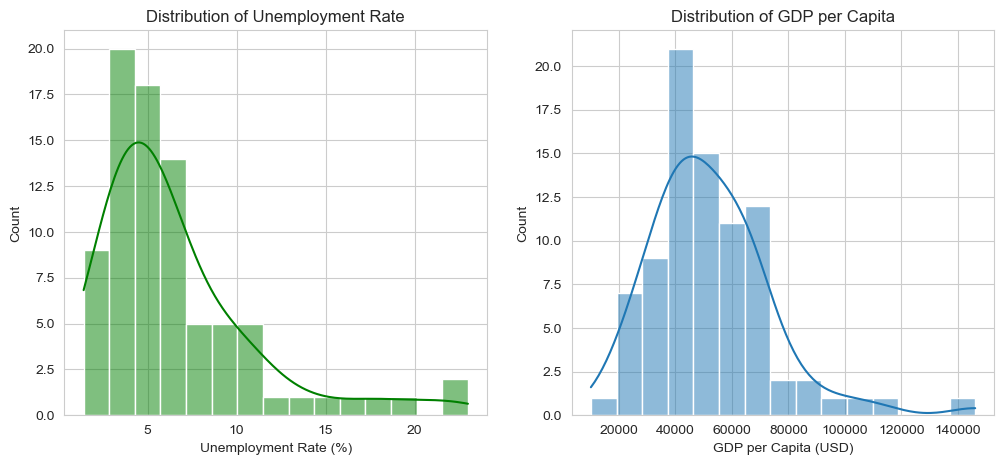

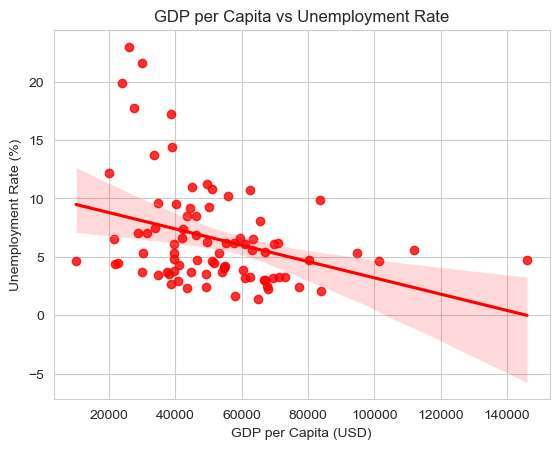

Correlation between GDP per Capita and Unemployment Rate: -0.34


In [256]:
plt.figure(figsize=(12,5))
# Creating an histogram to visualize the Unemployment Rate distribution
plt.subplot(1,2,1)
sns.histplot(data = city_data, x = 'Unemployment Rate', bins=15, kde=True,  color = 'green')
plt.title('Distribution of Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')

# Creating an histogram to visualize the GDP per Capita distribution
plt.subplot(1,2,2)
sns.histplot(data = city_data, x = 'GDP per Capita', bins=15, kde=True)
plt.title('Distribution of GDP per Capita')
plt.xlabel('GDP per Capita (USD)')

plt.show()

# Creating a scatter plot with a regression line
sns.regplot(data = city_data, x ='GDP per Capita', y = 'Unemployment Rate', scatter=True, color = 'red')
plt.title('GDP per Capita vs Unemployment Rate')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Unemployment Rate (%)')
plt.show()

correlation = city_data['GDP per Capita'].corr(city_data['Unemployment Rate'])
print(f"Correlation between GDP per Capita and Unemployment Rate: {correlation:.2f}")



We can conclude that there's a moderate negative correlation between the 2 columns. This suggests that wealthier cities tend to have a lower unemployment rate, and that poorer citie have less robust working markets. However, the spread of the scatter points indicates that there are other factors impacting unemployment.

4. b) Which are the top 5 cities with the largest difference between the Average
            Monthly Salary and Average Cost of Living? 
            What about the top 5 countries with the smallest average difference? 
            Show these results with meaningful visualizations

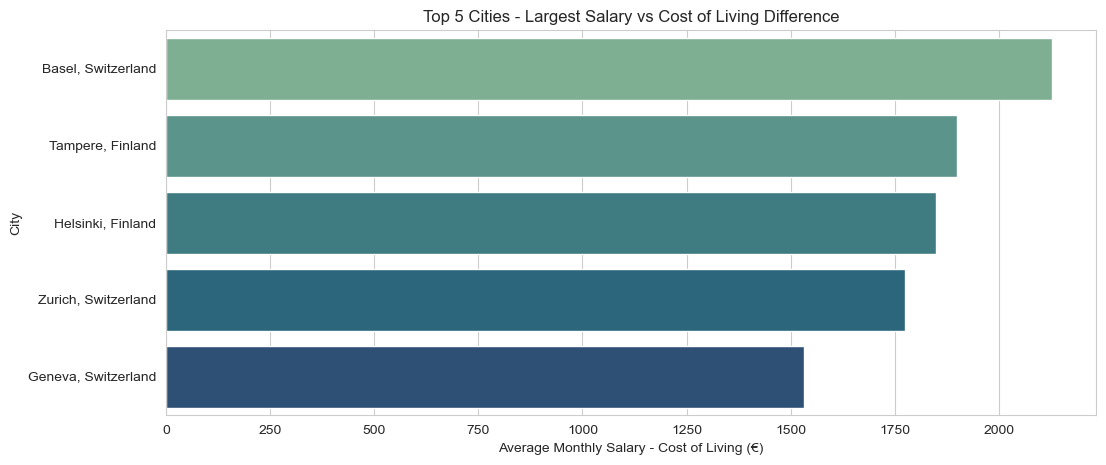

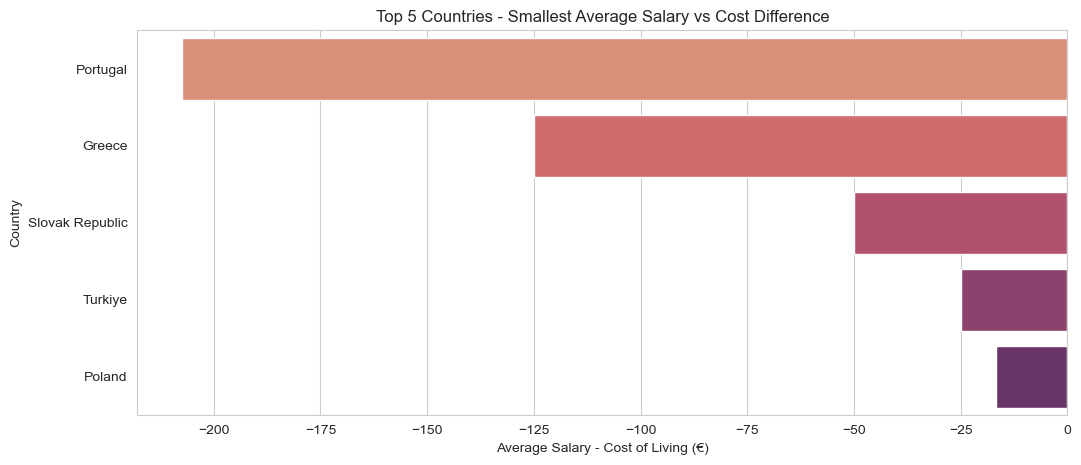

In [257]:
# Making a copy of the dataset to create new columns for visualization purposes without affecting the original dataset
city_data_copy2 = city_data.copy()

# Creating a new column that represents the difference between the average monthly salary and the average cost of living in each city
city_data_copy2['Salary-Living Diff'] = city_data['Average Monthly Salary'] - city_data['Average Cost of Living']
# Using the newly created column to isolate data for the plots creation
top5_cities = city_data_copy2.nlargest(5, 'Salary-Living Diff')
avg_country_diff = city_data_copy2.groupby('Country')['Salary-Living Diff'].mean().nsmallest(5)

# Creating a barplot that organizes the 5 cities with the largest average salary vs cost of living difference 
plt.figure(figsize=(12,5))
sns.barplot(data=top5_cities, x='Salary-Living Diff', y='City', palette='crest')
plt.title('Top 5 Cities - Largest Salary vs Cost of Living Difference')
plt.xlabel('Average Monthly Salary - Cost of Living (€)')
plt.ylabel('City')
plt.show()

# Creating a barplot that organizes the 5 countries with the smallest average salary vs cost of living difference
plt.figure(figsize=(12,5))
sns.barplot(x=avg_country_diff.values, y=avg_country_diff.index, palette='flare')
plt.title('Top 5 Countries - Smallest Average Salary vs Cost Difference')
plt.xlabel('Average Salary - Cost of Living (€)')
plt.ylabel('Country')
plt.show()

4. c) Which is the best city for someone seeking:
 - an average monthly salary above €2000,
 - a cost of living below or equal to €1600, and
 - the lowest unemployment rate possible?

In [258]:
# Filtering cities based on the criteria
filtered_cities = city_data[
    (city_data['Average Monthly Salary'] > 2000) & 
    (city_data['Average Cost of Living'] <= 1600)].copy()

# Sorting the filtered cities by Unemployment Rate 
best_cities = filtered_cities.sort_values(by='Unemployment Rate', ascending=True)

best_city = best_cities.iloc[0]
print(f"Best city based on the criteria: {best_city['City']}\n")
print("Top 5 best cities by Unemployment Rate:")

display(best_cities[['City', 'Unemployment Rate']].head())


Best city based on the criteria: Dresden, Germany

Top 5 best cities by Unemployment Rate:


,City,Unemployment Rate
24,"Dresden, Germany",3.8
23,"Leipzig, Germany",4.3
5,"Gent, Belgium",5.3
37,"Tampere, Finland",6.6
40,"Toulouse, France",8.5


<b>5. Additional Insights</b>

Note: for all these insights, we will use the copied dataset from the previous visualization, so we can create new features without affecting the original dataset.


<b>Insight 1: Wage share gap</b>

Comparing annualized salary to the GDP per Capita will show how much of the city's economic value is captured by the average worker.

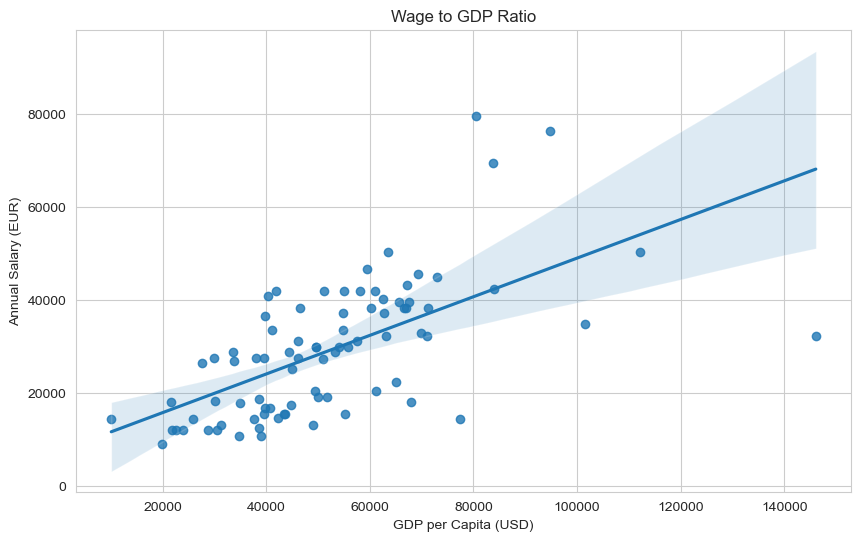

The correlation between GDP per Capita and Annual Salary is 0.62

Cities where workers get the best share of GDP:
                 City  Wage_GDP_Ratio
8   Dobrich, Bulgaria      142.716692
28    Odense, Denmark      101.230647
37   Tampere, Finland      100.109644

Cities where workers get the lowest share of GDP:
                           City  Wage_GDP_Ratio
80  Bratislava, Slovak Republic       18.590960
54                Cork, Ireland       22.177502
72               Warsaw, Poland       26.472924


In [259]:
# Consider the annual salary as 12 months of the average monthly salary (not counting benefits or other bonuses)
city_data_copy2['Annual Salary'] = city_data_copy2['Average Monthly Salary'] * 12

# Calculating the ratio
city_data_copy2['Wage_GDP_Ratio'] = (city_data_copy2['Annual Salary'] / city_data_copy2['GDP per Capita']) * 100

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.regplot(data=city_data_copy2, x='GDP per Capita', y='Annual Salary', scatter = True)
plt.title('Wage to GDP Ratio')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Annual Salary (EUR)')

plt.show()

correlation = city_data_copy2['GDP per Capita'].corr(city_data_copy2['Annual Salary'])
print(f"The correlation between GDP per Capita and Annual Salary is {correlation.round(2)}")

best_ratio = city_data_copy2.nlargest(3, 'Wage_GDP_Ratio')
worst_ratio = city_data_copy2.nsmallest(3, 'Wage_GDP_Ratio')

print("\nCities where workers get the best share of GDP:")
print(best_ratio[['City', 'Wage_GDP_Ratio']])
print("\nCities where workers get the lowest share of GDP:")
print(worst_ratio[['City', 'Wage_GDP_Ratio']])

We observed there's a moderately strong correlation between these 2 values, which confirms the general theory that cities with a higher GDP per Capita tend to have a higher annual salary. However, the correlation is not perfect, and we can see from the graphical representation that there is a notable spread of data points around the regression line. 

 - Points above the line are "over-performers", meaning the average worker has a higher salary than the city's GDP per Capita would indicate. This suggests a higher share of economic value is associated with the workers.

 - Points below the line are the opposite, where the salaries are relatively lower when compared to the city's GDP per Capita, which means most of the city's economic value is captured by the state or corporations rather than the workers.

We can also say the best and worst shares have a really big discrepancy, as the best ratios go over 100%, and the worst ones stay around 20%.



<b>Insight 2: Spoken languages to salary</b>

This insight will show if more international cities tend to pay better.

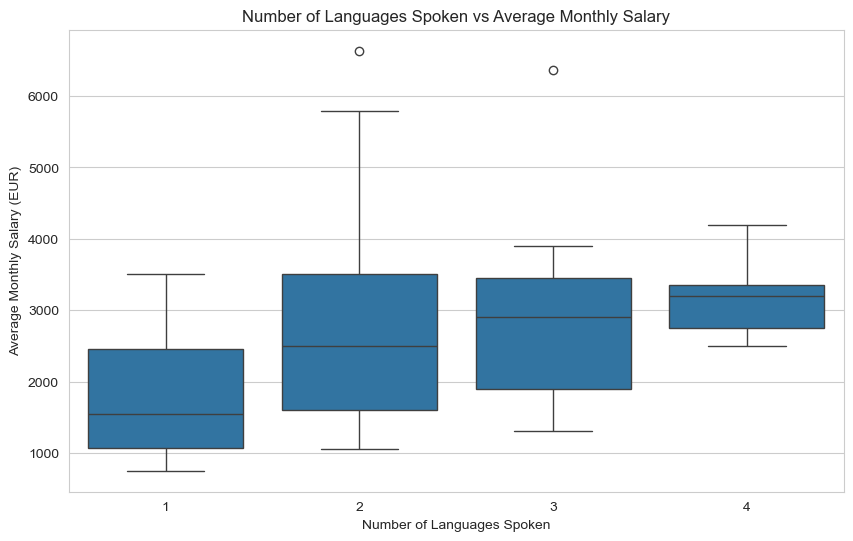

Correlation between Number of Languages and Salary: 0.38


In [260]:
# Creating a column to count how many languages are spoken in each city
city_data_copy2['Num_Languages'] = city_data_copy2['Main Spoken Languages'].str.split(',').apply(lambda x: len(x))

plt.figure(figsize=(10, 6))

sns.boxplot(data=city_data_copy2, x='Num_Languages', y='Average Monthly Salary')
plt.title('Number of Languages Spoken vs Average Monthly Salary')
plt.xlabel('Number of Languages Spoken')
plt.ylabel('Average Monthly Salary (EUR)')

plt.show()  

correlation = city_data_copy2['Num_Languages'].corr(city_data_copy2['Average Monthly Salary'])
print(f"Correlation between Number of Languages and Salary: {correlation.round(2)}")

We observed there is a noticeable but low correlation between these 2 columns, but from the boxplot we can take relevant insights.

From the graph obtained, we can see the average salary's floor (lower value) grows with the higher number of languages spoken, as well as the median. However, the ceiling is not as affected, having high average salary values for monolingual and bilingual cities, not that diverse from multilingual cases. 

The main conclusion we can take is that while diversity of languages helps, it's not a guarantee that there's a higher salary for multilingual cities, due to the high spread of data. This is probably due to different lines of work, as we know there are many cases where knowing more languages has no real value.

<b> Insight 3: Density of Population vs Average Rent Price </b>

Usually, there is a common assumption that cities with high population density will have higher rents. The logic is that high density implies high demand for living near central, busy places, which typically makes prices rise. We will test this assumption.

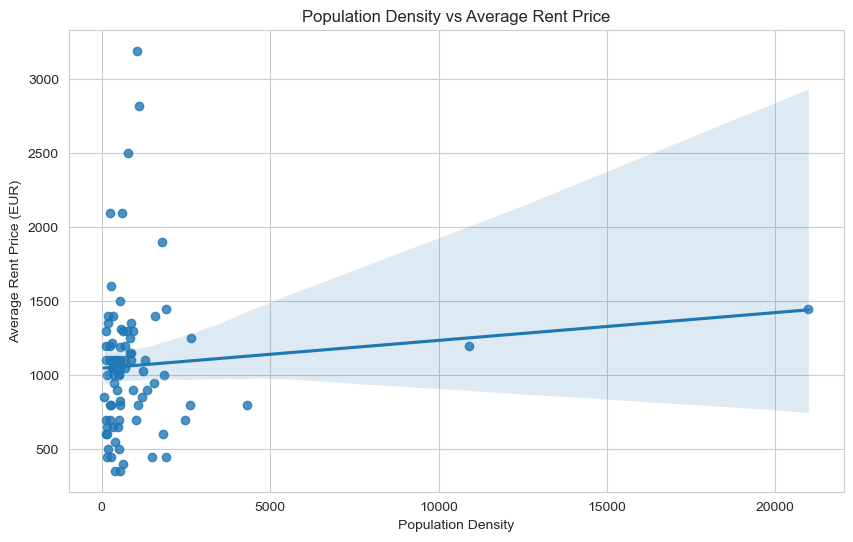

Correlation between Population Density and Average Rent Price: 0.1


In [262]:
plt.figure(figsize=(10, 6))

sns.regplot(data=city_data, x='Population Density', y='Average Rent Price', scatter=True)
plt.title('Population Density vs Average Rent Price')
plt.xlabel('Population Density')
plt.ylabel('Average Rent Price (EUR)')
plt.show()

correlation = city_data['Population Density'].corr(city_data['Average Rent Price'])
print(f"Correlation between Population Density and Average Rent Price: {correlation.round(2)}")

By checking the scatter points and the correlation between the 2 columns, we conclude that for our data, this assumption is incorrect, as we have a near-zero correlation and a high spread of points. 

This means that, according to our data, living in a dense city doesn't guarantee higher rent prices, and moving to a "spread out" city won't ensure savings. We conclude that there are better predictors for higher or lower rent prices.

<hr style = "border: 3px solid' #BFD72F';">

# <font color='#BFD72F'>2. Advanced Topic - Building an Interactive Map</font> <a class="anchor" id="P1"></a>

## <font color='#BFD72F'> 2.1 Web Scraping <a class="anchor" id="P1.1"></a>

We start by obtaining the Search bar URL from the main page link given in the project's guidelines.

In [132]:
# Loading the main page URL
url = "https://en.wikipedia.org/wiki/Main_Page"
response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
soup = BeautifulSoup(response.content, 'html.parser')

# Finding the search form by its 'action' attribute
search_form = soup.find('form', action=lambda x: x and '/w/index.php' in x)
action_url = search_form.get('action')
    
# Combine it with the main domain to create the full link
full_search_url = f"https://en.wikipedia.org{action_url}"
print(f"Target URL: {full_search_url}")

Target URL: https://en.wikipedia.org/w/index.php


Then, we define a function where by inputing a city, the output is equal to its coordinates, thrrough web scraping.

In [133]:
def get_coords(city_name):
    params = {'search': city_name, 'title': 'Special:Search', 'go': 'Go'}
    response = requests.get(full_search_url, params=params, headers = {'User-Agent': 'Mozilla/5.0'})
    soup = BeautifulSoup(response.text, 'html.parser')

    coords = soup.find('span', class_='geo')
    parts = coords.text.split(';')
    lat = parts[0].strip()
    lon = parts[1].strip()

    return lat, lon

# Example usage
city = "Lisbon"
lat, lon = get_coords(city)
print(f" {city} coordinates: Latitude= {lat}, Longitude= {lon}")

 Lisbon coordinates: Latitude= 38.72528, Longitude= -9.15000


We run a for loop to get the coordinates for every city in our dataset, and store them in newly created columns in the dataset (test run, no need to run as it takes some time and the next cell will fix the wrong cases detected).

In [134]:
# city_data['Latitude'] = None
# city_data['Longitude'] = None

# for index, row in city_data.iterrows():
    # city_name = row['City_Only']
    # try:
        # lat, lon = get_coords(city_name)
        # city_data.at[index, 'Latitude'] = lat
        # city_data.at[index, 'Longitude'] = lon
        # print(f"Fetched coordinates for {city_name}: ({lat}, {lon})")
    # except Exception as e:
       # print(f"Could not fetch coordinates for {city_name}: {e}")
    # time.sleep(1)

As we've seen in the previous cell, there are 3 cities where we could not get coordinates. To fix this, we will search for these cases manually, and change names for the search, in cases where it's needed.

In [135]:
# Manual mapping for cities with different names on Wikipedia
wiki_corrections = {
    "Gent": "Ghent",
    "Split": "Split, Croatia",
    "Cork": "Cork (city)"  
}

# Fetching coordinates with corrections
for index, row in city_data.iterrows():
    if row['City_Only'] in wiki_corrections:
        city_name = wiki_corrections[row['City_Only']]
    else:
        city_name = row['City_Only']
    try:
        lat, lon = get_coords(city_name)
        city_data.at[index, 'Latitude'] = lat
        city_data.at[index, 'Longitude'] = lon
        print(f"Fetched coordinates for {city_name}: ({lat}, {lon})")
    except Exception as e:
        print(f"Could not fetch coordinates for {city_name}: {e}")
    time.sleep(1)

Fetched coordinates for Vienna: (48.20833, 16.37250)
Fetched coordinates for Salzburg: (47.80000, 13.04500)
Fetched coordinates for Brussels: (50.84667, 4.35250)
Fetched coordinates for Antwerp: (51.21778, 4.40028)
Fetched coordinates for Ghent: (51.05361, 3.72528)
Fetched coordinates for Bruges: (51.20889, 3.22417)
Fetched coordinates for Sofia: (42.70, 23.33)
Fetched coordinates for Dobrich: (43.567, 27.833)
Fetched coordinates for Zurich: (47.37444, 8.54111)
Fetched coordinates for Geneva: (46.20167, 6.14694)
Fetched coordinates for Basel: (47.55472, 7.59056)
Fetched coordinates for Lefkosia: (35.17250, 33.36500)
Fetched coordinates for Lemesos: (34.67472, 33.04417)
Fetched coordinates for Prague: (50.08750, 14.42139)
Fetched coordinates for Ostrava: (49.83556, 18.29250)
Fetched coordinates for Berlin: (52.52000, 13.40500)
Fetched coordinates for Hamburg: (53.550, 10.000)
Fetched coordinates for Munich: (48.13750, 11.57500)
Fetched coordinates for Cologne: (50.93639, 6.95278)
Fetche

## <font color='#BFD72F'> 2.2 Interactive Map <a class="anchor" id="P1.1"></a>

To make the interactive map, we will first check if there are any missing values from the web scraping.have to drop the rows where the coordinate were not available on the website. For that, we will create a new variable for the map, so that we can preserve the data that's already in those rows.

In [136]:
city_data[['Latitude', 'Longitude']].isna().sum()

Latitude     0
Longitude    0
dtype: int64

As there are no missing values, we can continue.

For the map, we use the plotly function .scatter_geo to map the cities using the coordinates. 

We set the hovering data and hide the coordinates, leaving the columns:
 - Country
 - Population
 - Average Monthly Salary
 - Average Cost of Living

For personalization, we set the size of the city markers according to its population, and the color according to the Average Cost of Living.

In [137]:
fig = px.scatter_geo(map, lat='Latitude', lon='Longitude', scope='europe', 
                     hover_name='City_Only', hover_data={'Country': True,
                                                         'Population': True,
                                                         'Average Monthly Salary': True,
                                                         'Average Cost of Living': True,
                                                         'Latitude': False, 
                                                         'Longitude': False},
                     size='Population', color='Average Cost of Living', 
                     color_continuous_scale='solar',
                     title='Interactive Map of European Cities')

fig.update_layout(height=700)
fig.show()

<hr style = "border: 3px solid' #BFD72F';">

# <font color='#BFD72F'>3. Data Science in Action</font> <a class="anchor" id="P1"></a>

For this section, our group developed a recommendation system, where the user can input what matters most for their preferences, and have a top 5 ranking based on the measures indicated.

To enhance our analysis, we decided to include external information for more features. We collected this information from [numbeo.com](https://www.numbeo.com/).

## <font color='#BFD72F'> 3.1 Adding extra data <a class="anchor" id="P1.1"></a>



We start by importing extra data, collected from a reliable source, Numbeo. The specific page used can be accessed through:
 - https://www.numbeo.com/quality-of-life/region_rankings.jsp?title=2024&region=150&displayColumn=-1

Our extracting information process collected the data from the year 2024 only, as we believe the most recent data (according to the dataset's dates) is the most useful. We will import the dataset obtained and decide what to keep for the join.

In [138]:
# Importing the dataset
external_data = pd.read_csv('numbeo_citiesdata.csv', sep=';')
external_data.head()

,City,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,"The Hague (Den Haag), Netherlands",217.3,124.3,79.7,80.1,59.6,5.5,22.0,18.2,90.6
1,"Munich, Germany",186.7,109.7,79.0,76.7,66.7,13.4,30.9,25.8,76.0
2,"Ljubljana, Slovenia",171.0,66.0,78.6,67.2,53.2,13.2,26.1,23.1,76.1
3,"Zagreb, Croatia",161.2,62.8,78.3,64.5,49.7,13.8,30.3,33.6,82.2
4,"Eindhoven, Netherlands",206.9,114.5,77.8,78.0,64.4,5.9,24.1,19.6,85.4


As observed, this external dataset has a lot of new columns. We will keep only the ones we find most relevant for our intended purposes, which means features where a scale of 0-10 is unanimous for anyone (excluding, for example, climate related information, as a scale would be different for each person). Also, this data is stored as indexes, and for the columns we're using (Safety Index, Health Care Index, Pollution Index), the higher the value, the better evaluated the city is (except for pollution, which is the opposite).

Calculations used for these indexes can be found at: 
 - https://www.numbeo.com/quality-of-life/indices_explained.jsp

In [139]:
external_data = external_data[['City', 'Safety Index', 'Health Care Index','Pollution Index']]
external_data

,City,Safety Index,Health Care Index,Pollution Index
0,"The Hague (Den Haag), Netherlands",79.7,80.1,18.2
1,"Munich, Germany",79.0,76.7,25.8
2,"Ljubljana, Slovenia",78.6,67.2,23.1
3,"Zagreb, Croatia",78.3,64.5,33.6
4,"Eindhoven, Netherlands",77.8,78.0,19.6
...,...,...,...,...
70,"Dnipro, Ukraine",45.1,52.9,80.4
71,"Manchester, United Kingdom",44.9,75.4,53.7
72,"Athens, Greece",43.9,56.7,57.2
73,"Paris, France",42.1,78.0,64.6


Just so the join works on as many cities as possible from our dataset, we will fix 2 cases where the name is clearly different, identified by eye on the print above (The Hague and Cracow).

In [140]:
name_corrections = {'The Hague (Den Haag), Netherlands': 'The Hague, Netherlands',
                    'Krakow (Cracow), Poland': 'Cracow, Poland'}

external_data['City'] = external_data['City'].replace(name_corrections)

Now, we use a left join to add information from this external data to this project's dataset, while not adding any new cities and keeping the ones in the project's dataset.

In [141]:
merged_data = pd.merge(city_data, 
                       external_data, 
                       left_on='City', 
                       right_on='City', 
                       how='left')

merged_data

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update,City_Only,Country,Latitude,Longitude,Safety Index,Health Care Index,Pollution Index
0,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,2024-06-15,Vienna,Austria,48.20833,16.37250,70.3,79.0,17.5
1,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,2023-11-03,Salzburg,Austria,47.80000,13.04500,NaN,NaN,NaN
2,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,2023-04-22,Brussels,Belgium,50.84667,4.35250,45.1,73.4,61.7
3,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,2024-08-09,Antwerp,Belgium,51.21778,4.40028,NaN,NaN,NaN
4,"Gent, Belgium",552.0,645813,417832.0,24.8,5.3,53311.0,2,"Dutch, French",2400,827,1200,2023-07-17,Gent,Belgium,51.05361,3.72528,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,"Stockholm, Sweden",334.0,2344124,1534225.0,28.5,6.2,70950.0,0,"Swedish, English",2700,1400,2300,2024-09-11,Stockholm,Sweden,59.32944,18.06861,54.1,66.8,18.4
80,"Gothenburg, Sweden",245.0,1037675,672152.0,28.2,6.3,49588.0,0,"Swedish, English",2500,1200,2100,2023-03-10,Gothenburg,Sweden,57.70750,11.96750,53.6,67.8,20.2
81,"Malmo, Sweden",368.0,680335,436271.0,29.4,9.2,44387.0,0,"Swedish, English",2400,1100,2000,2024-07-07,Malmo,Sweden,55.60583,13.03583,NaN,NaN,NaN
82,"Ankara, Turkiye",1922.0,4843511,3417691.0,30.0,14.4,38916.0,3,Turkish,900,450,900,2023-06-08,Ankara,Turkiye,39.92889,32.85472,NaN,NaN,NaN


We know that there are a lot of cases missing after merging, and for these to be ready to use in our recommendation system, we will fill them with the mean value instead of the mean for the statistic in that country, as we assumed it would be better to have a magnitude of all the country's values. 

For cases where we have no cities from a specific country (e.g. Turkiye), we will use the overall median, so it won't standout from other cities but also not be highly affected.

In [ ]:
ext_features= ['Safety Index', 'Pollution Index', 'Health Care Index']

print(f'Missing values in the external features:\n{merged_data[ext_features].isna().sum()}')

# Using the country's mean
for col in ext_features:
    merged_data[col] = merged_data.groupby('Country')[col].transform(lambda x: x.fillna(x.mean()))

# Using the global median
for col in ext_features:
    remaining_nans = merged_data[col].isna().sum()
    if remaining_nans > 0:
        merged_data[col].fillna(merged_data[col].median(), inplace=True)

print(f'\nMissing values in the external features:\n{merged_data[ext_features].isna().sum()}')

Missing values in the external features:
Safety Index         40
Pollution Index      40
Health Care Index    40
dtype: int64

Missing values in the external features:
Safety Index         0
Pollution Index      0
Health Care Index    0
dtype: int64


## <font color='#BFD72F'> 3.2 Recommendation System<a class="anchor" id="P1.1"></a>

To normalize the features, so the system is balanced, we have to separate features as "bad" or "good". "Bad" features are better the lower their value is. "Good" features are the opposite. 

We will only use features which can be evaluated linearly, as in we can create a scale that doesn't depend on the user (e.g. higher salary is always better, more crime is always worse), to avoid too much complexity for the interactive system.

In [143]:
good_features = ['Average Monthly Salary', 'Safety Index', 'Health Care Index']
bad_features = ['Unemployment Rate', 'Average Cost of Living', 'Average Rent Price', 'Pollution Index']

all_features = good_features + bad_features

# Create a specific dataframe for the calculation to avoid changing the original
rec_system_data = merged_data[['City_Only', 'Country'] + all_features].copy()

For the scaling, we first used RobustScaler, as it is robust to outliers, which exist in this dataset, and we want to keep them, as the features we're working with are bound to have outliers.

On the scaled data, so we can give results as percentages, we used MinMaxScaler, to organize the values on a 0 to 1 scale.

After scaling, we invert the values from the "Bad" features. This makes sure that all features are seen as better the higher their value is.

In [144]:
# Applying RobustScaler to reduce the impact of outliers
scaler = RobustScaler()
rec_system_data[all_features] = scaler.fit_transform(rec_system_data[all_features])

# Applying MinMaxScaler to scale features between 0 and 1
scaler2 = MinMaxScaler()
rec_system_data[all_features] = scaler2.fit_transform(rec_system_data[all_features])

# Inverting the "Bad" features
for col in bad_features:
    rec_system_data[col] = 1 - rec_system_data[col]

Now, to finish, we create a function for the interactive recommendation system, where we use the input values from the user as weights for each feature, and calculate a score (as a percentage) to rank all the cities. As a result, the user gets a table with the top 5 matches according to their inputs.

Example: if 'Porto' has a Safety Index of 0.8 (features scaled between 0 and 1), and the user rates this feature's importance as a 5, 'Porto' gets 5 * 0.8 points added to its score.

In [149]:
def recommendation_system():
    display(Markdown("# **Where Should I Live?**"))
    display(Markdown("#### *Please rate the importance of the following factors from 0 (Don't care) to 10 (Crucial).*"))
                  

    # Create a dictionary to store user weights
    user_weights = {}    

    for feature in all_features:
        while True:
            try:
                # Ask the user for a number
                val = input(f"How important is '{feature}'? (0-10): ")
                val = float(val)
                if 0 <= val <= 10:
                    user_weights[feature] = val
                    break
                else:
                    print("Invalid input. Please enter a number between 0 and 10!")
            except ValueError:
                print("Invalid input. Please enter a number.")
    
    # Calculating the score
    rec_system_data['Final_Score'] = 0
    total_possible_score = sum(user_weights.values())
    for feature, weight in user_weights.items():
        rec_system_data['Final_Score'] += rec_system_data[feature] * weight

    # Converting to percentage, while making sure to avoid an error if total_possible_score is 0
    if total_possible_score > 0:
        rec_system_data['Match_Percentage'] = (rec_system_data['Final_Score'] / total_possible_score) * 100
    else:
        rec_system_data['Match_Percentage'] = 0

    # Highlighting the top 5 recommendations
    top_5 = rec_system_data.nlargest(5, 'Match_Percentage')[['City_Only', 'Country', 'Match_Percentage']]
    top_5.rename(columns={'City_Only': 'City'}, inplace=True)
    display(Markdown("## Here are the top matches found in our database!!\n"))
    display(top_5.style.format({'Match_Percentage': "{:.1f}%"})
                .background_gradient(cmap='Greens', subset=['Match_Percentage'])                
                .hide(axis='index'))
        

To try it, just run the cell below, and rate each feature's importance on a scale of 0 to 10 (floats included)!

In [150]:
recommendation_system()

# **Where Should I Live?**

#### *Please rate the importance of the following factors from 0 (Don't care) to 10 (Crucial).*

## Here are the top matches found in our database!!


City,Country,Match_Percentage
The Hague,Netherlands,81.5%
Stavanger,Norway,81.0%
Utrecht,Netherlands,80.3%
Munich,Germany,80.3%
Amsterdam,Netherlands,79.1%
